<h1> Final Project COVID model development </h1>

## Data proprocessing

The following section involves code for pre-processing the data before it can be passed through a neural network

In [2]:
#Load all relevant libraries 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import sklearn
from sklearn.model_selection import train_test_split
import pickle
import tensorflow as tf
import keras

In [ ]:
# Code to view an image
DATADIR = '/content/drive/MyDrive/FinalProject/LatestCovidDataset' 

#The 2 categories we are interested in
CATEGORIES = ['Normal','COVID']

for category in CATEGORIES:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

In [3]:
training_data = []   #Array to store training images 

#load file path to dataset
DATADIR = '/content/drive/MyDrive/FinalProject/LatestCovidDataset'
#Labels
CATEGORIES = ['Normal','COVID']

#Function pre-process images 
def create_training_data():
  for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    class_num = CATEGORIES.index(category)
    print(class_num)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img))
        # resize all images 
        new_array = cv2.resize(img_array, (60,60))  
        # store images in array with labels
        training_data.append([new_array, class_num])  
      except Exception as e:
        pass

create_training_data()

0
1


In [4]:
print(len(training_data))

7600


In [5]:
X = []
Y = []

#Store images and labels in seperate arrays
for features, label in training_data:
  X.append(features)
  Y.append(label)

#store images in numpy arrays
X = np.array(X).reshape(-1, 60, 60, 3)
Y = np.array(Y)

#normalise images
X = X/255.0

In [6]:
#dataset split to training and testing. 
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)

In [7]:
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('y_test', y_test.shape)

x_train (6080, 60, 60, 3)
y_train (6080,)
x_test (1520, 60, 60, 3)
y_test (1520,)


In [8]:
print(y_train[:10])
print(y_test[:10])


[0 1 1 0 0 1 1 1 1 0]
[1 0 1 0 1 0 0 0 0 0]


In [9]:
count = 0

for i in y_train:
  if i == 1:
    count = count + 1

print (count)

2890


## Building the model

The following section contains code for building the models for the various experiments.

In [60]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import pickle
from keras.callbacks import EarlyStopping

In [61]:
#A custom early stopping function created for early stopping experiments 
custom_early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=6,
    min_delta=0.001,
    mode='min'
)

In [62]:
#Build convolutional neural network
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=X.shape[1:]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))

#flatten 3d array to 1d array 
model.add(layers.Flatten())
#dense layer      
model.add(layers.Dense(512, activation='relu'))  
#output results using sigmoid activation
model.add(layers.Dense(1, activation='sigmoid'))    

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=100,
                    validation_split = 0.20,     #20% of training data
                    callbacks=[custom_early_stopping]
                    )

Epoch 1/100
76/76 [==============================] - 31s 401ms/step - loss: 0.6716 - accuracy: 0.5616 - val_loss: 0.4677 - val_accuracy: 0.7632
Epoch 2/100
76/76 [==============================] - 30s 394ms/step - loss: 0.4569 - accuracy: 0.7715 - val_loss: 0.4136 - val_accuracy: 0.8051
Epoch 3/100
76/76 [==============================] - 30s 394ms/step - loss: 0.3928 - accuracy: 0.8194 - val_loss: 0.3612 - val_accuracy: 0.8298
Epoch 4/100
76/76 [==============================] - 30s 394ms/step - loss: 0.3211 - accuracy: 0.8446 - val_loss: 0.3435 - val_accuracy: 0.8421
Epoch 5/100
76/76 [==============================] - 30s 393ms/step - loss: 0.2975 - accuracy: 0.8642 - val_loss: 0.2908 - val_accuracy: 0.8783
Epoch 6/100
76/76 [==============================] - 30s 392ms/step - loss: 0.2505 - accuracy: 0.8907 - val_loss: 0.2978 - val_accuracy: 0.8692
Epoch 7/100
76/76 [==============================] - 30s 392ms/step - loss: 0.2279 - accuracy: 0.9052 - val_loss: 0.2799 - val_accuracy:

In [68]:
#Save entire model for website
#model.save("CovidModelSave.h5")

In [ ]:
#from google.colab import files
#files.download("CovidWeights.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 59, 59, 124)       1612      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 29, 29, 124)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 160)       79520     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 160)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 186)       268026    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 186)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6696)             

In [63]:
#plot training vs validation accuracy performance 
history_dict = history.history

def plot_acc():
    
    plt.clf()

    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.savefig('val_loss (acc).png', dpi=300)

    plt.show()

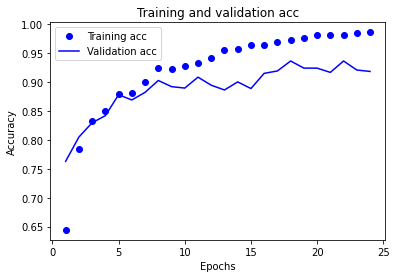

In [64]:
plot_acc()

In [65]:
#plot training vs validation loss performance 

def plot_loss():

    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    solid_blue_line = 'b'

    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('val_loss (loss).png', dpi=300)

    plt.show()

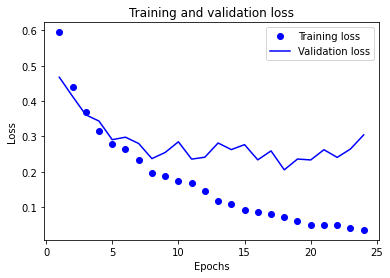

In [66]:
 plot_loss()

# Experiments 

The following section contains all the experiments conducted.

##1-Layer Experiments 

|Number of conv layers|Filters|Val-Accuracy|Optimum epoch|Grid-size|
|:-------|:-------|:-------|:-------|:-------|
|1|4|0.8914|20|(2,2)
|1|12|0.8949|20|(2,2)
|1|32|0.9153|20|(2,2)
|1|64|0.9243|19|(2,2)
|1|96|0.9268|19|(2,2)

<br>

From the table of results it can be seen that the optimum epoch is generally reached at the final epoch. This highlights that the model is underfitting. Underfitting refers to when a model does not fit the training data well enough meaning it cannot generalise. A filter is a set of learnable weights which are learned using the backpropagation algorithm. Effectively, each filter in a convolutional layer stores a single tempalte or pattern derived from the input image. The more filters that are used in a ocnvolutional layer the more patterns tha can be learned up to a certain point. When the number of filters are increased it seems the optimum epoch is still reached at the very end of the training process, highlihgting that the network is likely to be too small and weak.

<br>

![1 conv 4 filter Acc](https://drive.google.com/uc?export=view&id=1M4qw8yYZORbnBOzfUNiRglLxkZtUYzcH)
![1 conv 4 filter Loss](https://drive.google.com/uc?export=view&id=18VMEYfE1OpZjGJlA4uSGtBPTfRJvTWwh)

<br> 

The above graphs present the accuracy and loss when using 4 filters. We can see that there is a gap between the validation and training accuracy/loss. This is expected given that the validation set contained unseen data. The validation accuracy continues to increase up-to even the last epoch. 

<br>

![1 conv 96 filter Acc](https://drive.google.com/uc?export=view&id=1KhVWBv4fK-bd53bfVl-kx1VirYq1iZXg)
![1 conv 96 filter Loss](https://drive.google.com/uc?export=view&id=1GFhXxRRwvt8nEmyORZK2zHZjaAB9nTw7)

The graphs above represent the performance of the 96 filter model. There seems to be not much difference in these graphs in comparison to the graphs for the 4 filter model. Therefore, increasing the amount of filters for a 1 layer covnet seems to have no significant impact on validation performance. 

<br>

In a convolutional layer, a  filter slides over all the pixels of the image taking their dot product. This is done with the hopes that the linear combination of the pixels weighted by the convolutional filter extracts some kind of feature from the image. Usually, an odd-sized filter is used because all the previous layer pixels are symmetrically around the output pixel. When even sized kernals are used, there may be distortions across the layers that need to be dealt. I opted to experiment with a (2,2) grid and then a (3,3) to explore the differences if any. 

![1 conv 96 filter Acc (3,3)](https://drive.google.com/uc?export=view&id=12rcFXSxvQ9g0YfDR4cm-WbFkelvBBkSQ)
![1 conv 96 filter Loss (3,3)](https://drive.google.com/uc?export=view&id=1IP8Yk2-1DDmDjjq0h2jjerGurmsmfLEY)

If we compare the graphs above with the previous graphs, it can be seen that using a (3,3) grid results in less differences in performance between the training and validation performances. 

Based on these experiments it seems using only 1 convolutional layer results in underfitting even when increasing the number of filters. This suggest that the model is underpowered and therefore more convolutional layers may be required. 





## 2-Layer Experiments

|Number of conv layers|Filters|Val-Accuracy|Optimum epoch|Grid-size|
|:-------|:-------|:-------|:-------|:-------|
|2|4,12|0.9276|20|(2,2)
|2|12,32|0.9079|17|(2,2)
|2|32,64|0.9087|20|(2,2)
|2|64,96|0.9408|16|(2,2)
|2|96,124|0.9474|20|(2,2)
|2|124,160|0.9441|16|(2,2)

<br> 

As the number of filters increase in the 2-layer experiments the optimum validation accuracy gradually increases aswell. More filters mean that the neural network is able to learn complex features/patterns and therefore more accurately classify the images. 

![2 conv 4,12 filter Acc (2,2)](https://drive.google.com/uc?export=view&id=194AjJi-cL0cQT9foPMHioXzIC_gMBzAo)
![2 conv 4,12 filter Loss (2,2)](https://drive.google.com/uc?export=view&id=1H9xtAFvACsGUQiX2WbDRo4vk9gUEHih3)

From the above graphs, presenting performance of the (4,12) model, we can see that the model is underfitting due to the small network. The optimum validation accuracy (0.9104) is reached at epoch 17. After this point it seems performance seems to plateau. 

![2 conv 64,96 filter Acc (2,2)](https://drive.google.com/uc?export=view&id=1fj6vefyr4iZIYJ2M1MSGw2EnjwxUSIWH)
![2 conv 64,96 filter Loss (2,2)](https://drive.google.com/uc?export=view&id=1mmN3FaY0L2Df6e_nKLjXyi_GtBvi38zV)

It can be seen from the (64,96) model graphs above, increasing the number of filters and therefore complexity of a model results in a reduction of underfitting, up to a certain point. It can also be seen that the difference between the training and validation performance in terms of accuracy and loss seems to be greater for this larger model. This suggests, during the latter stage of training, the model starts to overfit.   













## 3-Layer Experiments


|Number of conv layers|Filters|Val-Accuracy|Optimum epoch|Grid-size|
|:-------|:-------|:-------|:-------|:-------|
|3|4,12,32|0.9054|17|(2,2)
|3|32,64,128|0.9350|20|(2,2)
|3|64,96,128|0.9352|19|(2,2)
|3|96,128,160|0.9317|18|(2,2)
|3|128,160,186|0.9408|17|(2,2)

<br>

![2 conv 4,12,32 filter Acc (2,2)](https://drive.google.com/uc?export=view&id=1_clcx6IT1GvFIZP8S0aqUnMu0DipP80V)
![2 conv 4,12,32 filter Loss (2,2)](https://drive.google.com/uc?export=view&id=1lmiXDJFcD4E-hGUSgDdiO1xzLEr1kLsq)

Once again, i started off with a small network. From the above graphs we can see that there is little variance of performance between the training and validation set of images. The highest level of accuracy is reached at the very end of the training cycle (at epoch 19).

<br>

![2 conv 124,160,186 filter Acc (2,2)](https://drive.google.com/uc?export=view&id=1_bdG4M_t-YxWbNVaZjKbhb1tg73Md_Mc)
![2 conv 124,160,186 filter Loss (2,2)](https://drive.google.com/uc?export=view&id=19N0JG2q81wML06uarcZPSo8lU0RxZEmX)

In contrast, when using 3 convolutional layers with a greater amount of filters, there is a much greater variance in performance between the training and validation images. This is highlighted by the graphs above presenting the performance of the model with filters = (124,160,186). It also seems that the model starts to overfit towards the end. 

Just like before, we can see from the results table that increasing the number of filters withing the three convolutional layers has little to no impact on when the peak accuracy is reached. Regarding the value of the peak accuracy however, the highest accuracy recorded increases as the size (complexity) of the model increases. 








When using small models with low amount of filters, in each of these sets of experiments, the model generally underperformed (underfitted). However, when the size of the model was increased, by adding more filters, the model started to overfit. This makes sense becasue if the model is too big and complex for the dataset, it may fit the data too well. In turn, the model will struggle to generalise on unseen data (the validation set). 

The very best validation accuracy was reached when using 2 convolutional layers (0.9474). This suggests, one layer may not be enough to learn the complex patterns and features of these x-rays, however three may be too much.  

For the 1 layer experiments, it seemed that when the peak validation accuracy was reached was farely constant (epoch 19 or 20). When using anymore layers, there is a little more varience (epoch 17 -20). 



##<font color='forestgreen'>**Regularisation**</font>

Regularisation refers to techniques in machine learning that reduce error and overfitting by fitting a function onto the given training set. This in turn improves the model's performance on the unseen data.

### **Dropout**

Dropout is a common method of regularisation that works by dropping some layer outputs during training so that they do not contribute any information during those updates. This forces other active neurons to learn harder. For each update different outputs will be dropped at random. Dropout rate refers to the probability of a given node in a layer being trained. 

<br>

|Dropout Rate|Val-Accuracy|Optimum epoch|
|:-------|:-------|:-------|
|0.20|0.9416|19
|0.35|0.9416|17
|0.50|0.9465|19

![No Dropout)](https://drive.google.com/uc?export=view&id=19N0JG2q81wML06uarcZPSo8lU0RxZEmX)
![Dropout (0.2)](https://drive.google.com/uc?export=view&id=1anPsMVXDjXzoAbBNN7OPqpXN0NSxE950)
![Dropout 0.35](https://drive.google.com/uc?export=view&id=1j9n1Nge2YqENZLjSVJxZ8-nkLBawe-6P)
![Dropout 0.5](https://drive.google.com/uc?export=view&id=1BiWMiiDKNd5nEqiqdi8puXGNLXQHTP-2)

The graphs above present the performance of the non-dropout model, dropout [0.2], dropout [0.35] and dropout [0.5], from left to right. As the Dropout rate is increased, overfitting decreases. 












### **L1 + L2 Regularisation**

L1 and L2 Regularisation are some of the most common methods of regularisation used. These update the general cost function by adding another term known as the regularization term. Due to the addition of this regularization term, the values of weight matrices decrease because it assumes that a neural network with smaller weight matrices leads to simpler models. Therefore, it will also reduce overfitting to quite an extent (Link 1).

Lambda is used to represent the value parameter that you can adjust when using L1 or L2 regularisation. Lambda can take a value between 0 and 1. The greater the value, the heavier the added weight. 

<br><br><br>

|Type|Lambda Value|Val-Accuracy|Optimum epoch|
|:-------|:-------|:-------|:-------|
|L1|0.0001|0.9153|17
|L2|0.0001|0.9441|18

<br>

![L1 Regularisation Loss)](https://drive.google.com/uc?export=view&id=1UGWg_Kb8IvhJ134d6xvPo9jODMEUmqiI)
![L2 Regularisation)](https://drive.google.com/uc?export=view&id=1ONXI2Z9v8LZOyxMepXWqksxdXj-he4o_)

From the loss graphs, l1 regularisation (on the left) looks to be more effective in reducing overfitting than l2. Both have similar peak accuracy values that occur as similar points in the training process. 

<br><br>




### **Early Stopping**

Early stopping is another popular method of reducing overfitting. This technique works by monitoring the validation performance. When performance stops improving the training process stops (figure 2). Patience refers to the number of epochs training continues for after improvements have stopped. Validation accuracy will be the value monitored for early stopping. 

<br>

|Monitor|Patience|min_delta|Val-Accuracy|Epochs|Optimum epoch|
|:-------|:-------|:-------|:-------|:-------|:-------|
|val_accuracy|6|0.001|0.9424|23|17
|val_loss|6|0.001|0.9342|20|16




##<font color='forestgreen'>**Convolutional Grid Experiments**</font>

Convolutional layers work by moving a square grid across the input image. For each point on the image, a value is calculated based on the grid using a convolutional operation. The size of the grid determines the amount of pixels that are worked on at a time. So far, a 2 by 2 grid has been used for the experiments. The following experiment will test the impact on performance of using a 3 by 3 grid instead. 

|Grid Size|Model|Val-Accuracy|Optimum epoch|
|:-------|:-------|:-------|:-------|
|(2,2)|32-64-96|0.9043|20
|(3,3)|32-64-96|0.9308|18
|(5,5)|32-64-96|0.9268|20


Strides in convolutional layers, refer to the steps the grid takes. By default, the stride length is (1,1). This means the grid is moved one pixel right for each horizontal movement of the grid and one pixel down for each vertical movement of the grid.

|Model|Stride length|Val-Accuracy|Optimum epoch|
|:-------|:-------|:-------|:-------|
|32-64-128|(1,1)|0.9383|15
|32-64-128|(2,2)|0.9301|14
|32-64-128|(3,3)|0.9263|13





##<font color='forestgreen'>**Testing**</font>

In the following section the finalised model is built and tested on the test set. 'model.evaluate' is used to provide a single value for accuracy and loss.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping


#Build network
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=X.shape[1:]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy']
             )

history = model.fit(x_test,
                    y_test,
                    batch_size=64,
                    epochs=20,
                    )


In [16]:
#model.evaluate provides a value to measure generalisablilty 
result = model.evaluate(x_test, y_test)

result

48/48 [==============================] - 3s 53ms/step - loss: 0.1199 - accuracy: 0.9586


[0.1199469119310379, 0.9585526585578918]

In [12]:
#plot accuracy performance of final model on test set
history_dict = history.history

def plot_acc():
    
    plt.clf()

    acc = history_dict['accuracy']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, acc, 'bo')
    plt.title('Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.savefig('test (acc).png', dpi=300)

    plt.show()

No handles with labels found to put in legend.


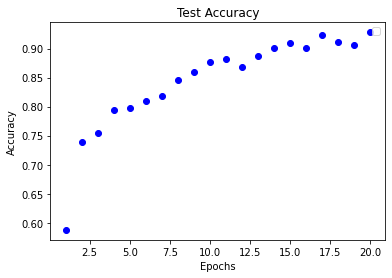

In [13]:
plot_acc()

In [14]:
#plot loss performance of final model on test set
def plot_loss():

    history_dict = history.history
    loss = history_dict['loss']
    
    epochs = range(1, len(loss) + 1)

    blue_dots = 'bo'
    
    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.title('Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.savefig('test (loss).png', dpi=300)

    plt.show()

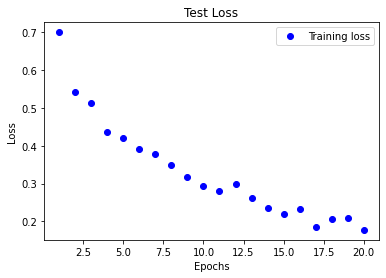

In [15]:
plot_loss()